In [1]:
from IPython.display import display, clear_output
from PIL import Image, ImageDraw
import time

import fitz  # PyMuPDF

In [2]:

def convert_pdf_to_images(pdf_path, bounding_boxes):
    pdf_document = fitz.open(pdf_path)
    for page_num in range(len(pdf_document)):
        page = pdf_document.load_page(page_num)
        pix = page.get_pixmap()
        image = Image.frombytes("RGB", [pix.width, pix.height], pix.samples)
        draw_bounding_boxes(image, page_num + 1, bounding_boxes)
        display(image)
        time.sleep(3)
        clear_output(wait=True)

def draw_bounding_boxes(image, page_num, bounding_boxes):
    draw = ImageDraw.Draw(image)
    
    if page_num in bounding_boxes:
        for box in bounding_boxes[page_num]:
            draw.rectangle(box, outline="red", width=3)

def process_image(image_path, bounding_boxes):
    image = Image.open(image_path)
    draw_bounding_boxes(image, 1, bounding_boxes) 
    display(image)


In [3]:
bounding_boxes = {
    1: [(108, 378, 478, 656)],  # Figure 5 on page 1
    2: [(108, 156, 478, 530)]  # Figure 6 on page 2
}

pdf_path = "./data/papers/simple_test.pdf"
image_path = "./data/images/simple_test.png"

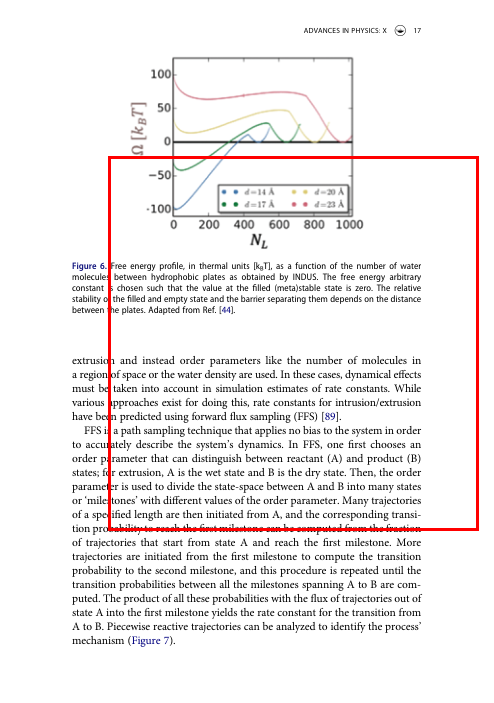

In [4]:

convert_pdf_to_images(pdf_path,bounding_boxes)
#process_image(image_path, bounding_boxes)
